# **KNN**

**Задача классификации на датасете data/data.csv. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ - *Churn*.**

Обучим модель классификации KNN, используя безлайны без сильной обработки выборок и оценим точности предсказания с помощью основных метрик

  Размер: 7043 строк, 21 столбцов

Первые 3 строки данных:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

,Метрика,Значение
0,Accuracy,0.766501
1,Precision,0.581227
2,Recall,0.430481
3,F1-Score,0.494624
4,ROC-AUC,0.749915


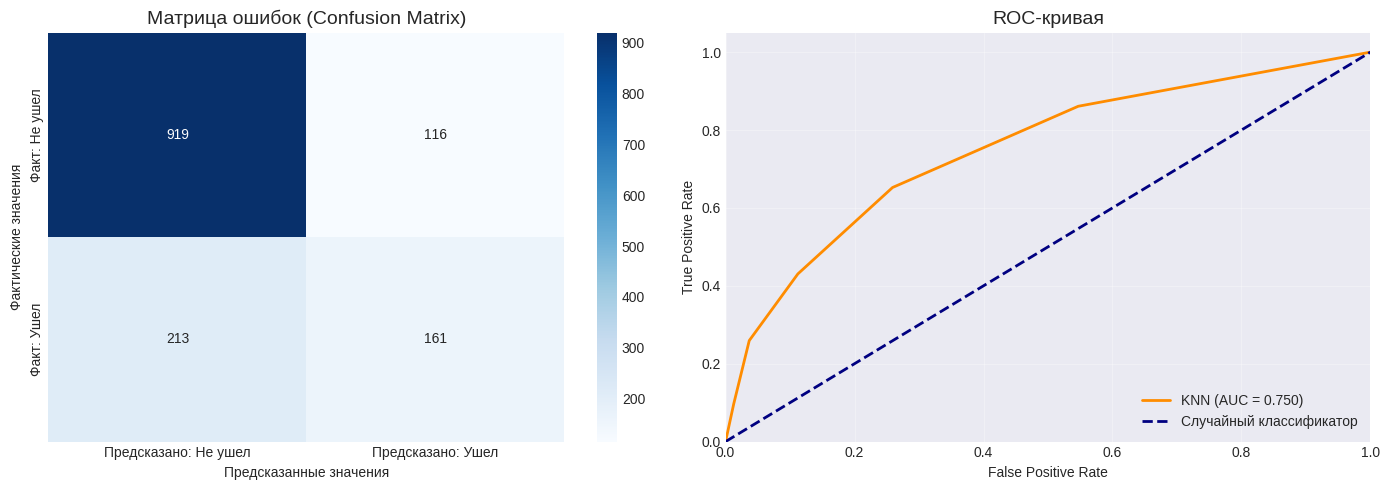

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('data/data.csv')
print(f"  Размер: {df.shape[0]} строк, {df.shape[1]} столбцов\n")

print("Первые 3 строки данных:")
display(df.head(3))
print("\nИнформация о столбцах:")
df.info()

df_clean = df.copy()

# удалим айди пользователя, он не требуется
df_clean = df_clean.drop('customerID', axis=1)

# преобразуем переменную TotalCharges и целевую переменную Churn
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', '0')
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])
df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# удалим категориальные признаки
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_numeric = df_clean.drop(categorical_cols, axis=1)

# все признаки для обучения
print("\nЧисловые признаки для бейзлайна:")
print(df_numeric.columns.tolist())
print(f"\nИтоговый размер данных для модели: {df_numeric.shape}")

# разделим на обучающую и тестовую выборки
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

print(f" признаки (X): {X.shape}")
print(f" целевая переменная (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {y_train.value_counts().to_dict()})")
print(f" Y_test: {y_test.shape} (распределение: {y_test.value_counts().to_dict()})")

# создаем и обучаем модель
knn_baseline = KNeighborsClassifier(n_neighbors=5)
knn_baseline.fit(X_train, y_train)

print("\nОбучение завершено")

# делаем предсказания
y_pred = knn_baseline.predict(X_test)
y_pred_proba = knn_baseline.predict_proba(X_test)[:, 1]

print("Предсказания сделаны")

# Оцениваем точность модели основными метриками

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy, precision, recall, f1, roc_auc]
})

print("\nПолучившиеся метрики:")
display(metrics_df)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix)', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'KNN (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Теперь имплиментируем классификатор KNN и обучим его на бейзлайне, посмотрим на метрики


Числовые признаки для бейзлайна:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Итоговый размер данных для модели: (7043, 5)
 признаки (X): (7043, 4)
 целевая переменная (y): (7043,)
 X_train: (5634, 4)
 X_test: (1409, 4)
 Y_train: (5634,) (распределение: {0: 4139, 1: 1495})
 Y_test: (1409,) (распределение: {0: 1035, 1: 374})

Обучение завершено
Предсказания сделаны

 Получившиеся метрики:


,Метрика,Значение
0,Accuracy,0.765791
1,Precision,0.579710
2,Recall,0.427807
3,F1-Score,0.492308
4,ROC-AUC,0.751918


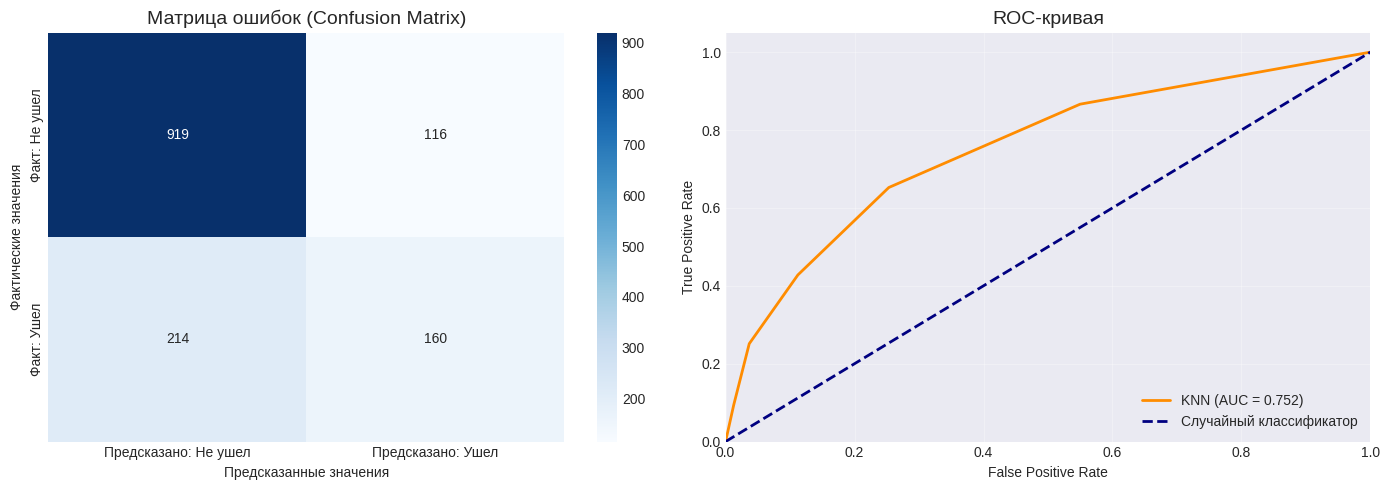

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

#имплиментированный классификатор
class MyKNNClassifier:
    def __init__(self, n_neighbors=5, weights='uniform', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric
        self.X_train = None
        self.y_train = None
        self.classes_ = None

    def _calculate_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Метрика '{self.metric}' не поддерживается")

    def _get_neighbors(self, x):
        distances = []

        for i, train_point in enumerate(self.X_train):
            dist = self._calculate_distance(x, train_point)
            distances.append((i, dist))

        distances.sort(key=lambda x: x[1])
        neighbors = distances[:self.n_neighbors]

        return neighbors

    def _predict_single(self, x):
        neighbors = self._get_neighbors(x)

        if self.weights == 'uniform':
            neighbor_labels = [self.y_train[idx] for idx, _ in neighbors]
            most_common = Counter(neighbor_labels).most_common(1)[0][0]
            return most_common

        elif self.weights == 'distance':
            votes = {}

            for idx, dist in neighbors:
                label = self.y_train[idx]
                weight = 1.0 / (dist + 1e-10)

                if label not in votes:
                    votes[label] = 0
                votes[label] += weight

            predicted_class = max(votes.items(), key=lambda x: x[1])[0]
            return predicted_class

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = []

        for x in X:
            pred = self._predict_single(x)
            predictions.append(pred)

        return np.array(predictions)

    def predict_proba(self, X):
        X = np.array(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        proba = np.zeros((n_samples, n_classes))

        for i, x in enumerate(X):
            neighbors = self._get_neighbors(x)

            if self.weights == 'uniform':
                neighbor_labels = [self.y_train[idx] for idx, _ in neighbors]
                counts = Counter(neighbor_labels)

                for j, cls in enumerate(self.classes_):
                    proba[i, j] = counts.get(cls, 0) / self.n_neighbors

            elif self.weights == 'distance':
                total_weight = 0
                class_weights = {cls: 0 for cls in self.classes_}

                for idx, dist in neighbors:
                    label = self.y_train[idx]
                    weight = 1.0 / (dist + 1e-10)
                    class_weights[label] += weight
                    total_weight += weight

                for j, cls in enumerate(self.classes_):
                    proba[i, j] = class_weights[cls] / total_weight if total_weight > 0 else 0

        return proba

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


df_clean = df.copy()

# удалим айди пользователя, он не требуется
df_clean = df_clean.drop('customerID', axis=1)

# преобразуем переменную TotalCharges и целевую переменную Churn
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', '0')
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])
df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# удалим категориальные признаки
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_numeric = df_clean.drop(categorical_cols, axis=1)

# все признаки для обучения
print("\nЧисловые признаки для бейзлайна:")
print(df_numeric.columns.tolist())
print(f"\nИтоговый размер данных для модели: {df_numeric.shape}")

# разделим на обучающую и тестовую выборки
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

print(f" признаки (X): {X.shape}")
print(f" целевая переменная (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {y_train.value_counts().to_dict()})")
print(f" Y_test: {y_test.shape} (распределение: {y_test.value_counts().to_dict()})")


my_knn = MyKNNClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
my_knn.fit(X_train, y_train)
print("\nОбучение завершено")

y_pred = my_knn.predict(X_test)
y_pred_proba = my_knn.predict_proba(X_test)[:, 1]
print("Предсказания сделаны")


# Оцениваем метрики

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy, precision, recall, f1, roc_auc]
})

print("\n Получившиеся метрики:")
display(metrics_df)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix)', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'KNN (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Теперь улучшим бейзлайн для классификатора KNN, обучим заново модель на получившемся датасете

Размер данных: (7043, 21)

Первые 5 строк:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

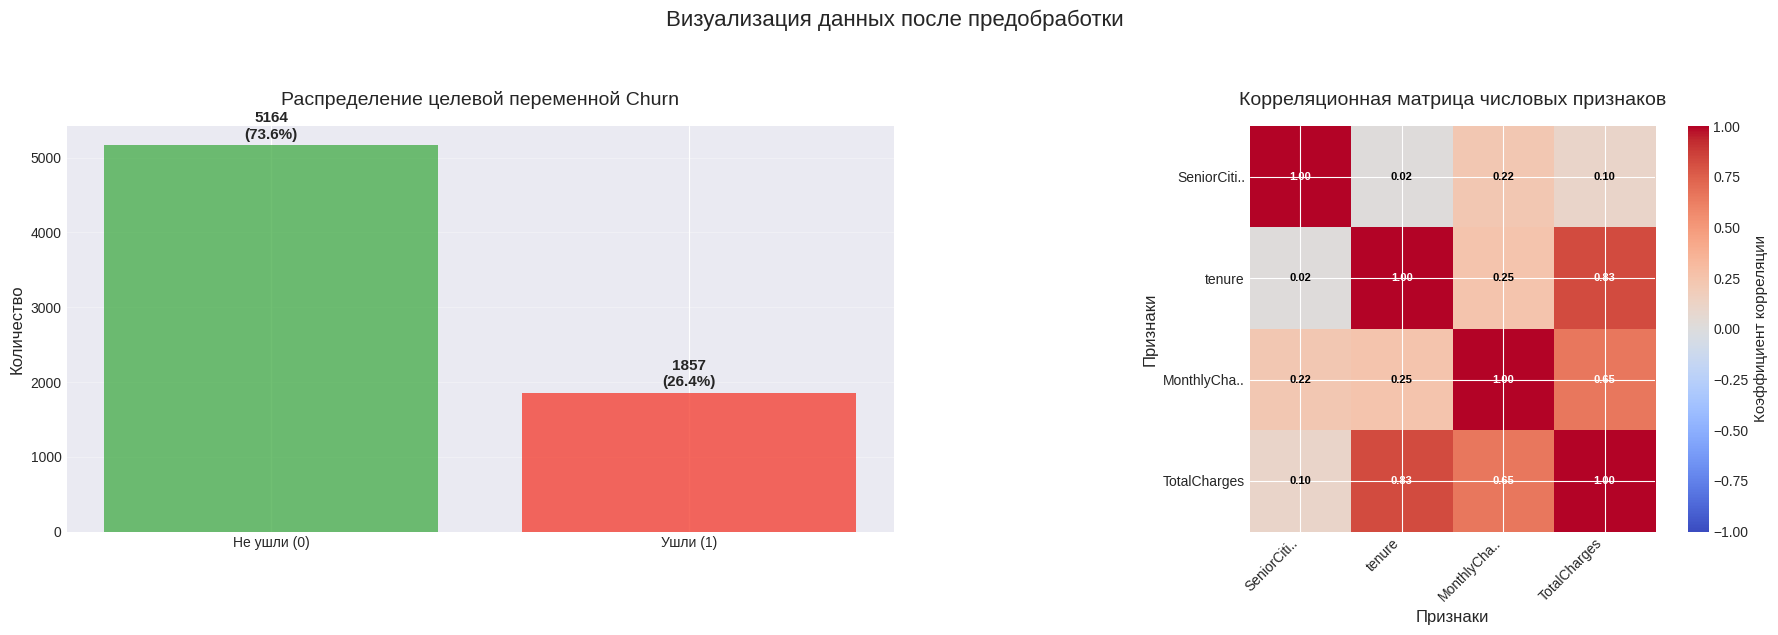

 X.shape: (7021, 19)
 y.shape: (7021,)
 Распределение классов: {0: np.int64(5164), 1: np.int64(1857)}
 Доля положительного класса: 0.264

 Размер данных после предобработки: (7021, 30)

 Количество признаков после one-hot кодирования: 30


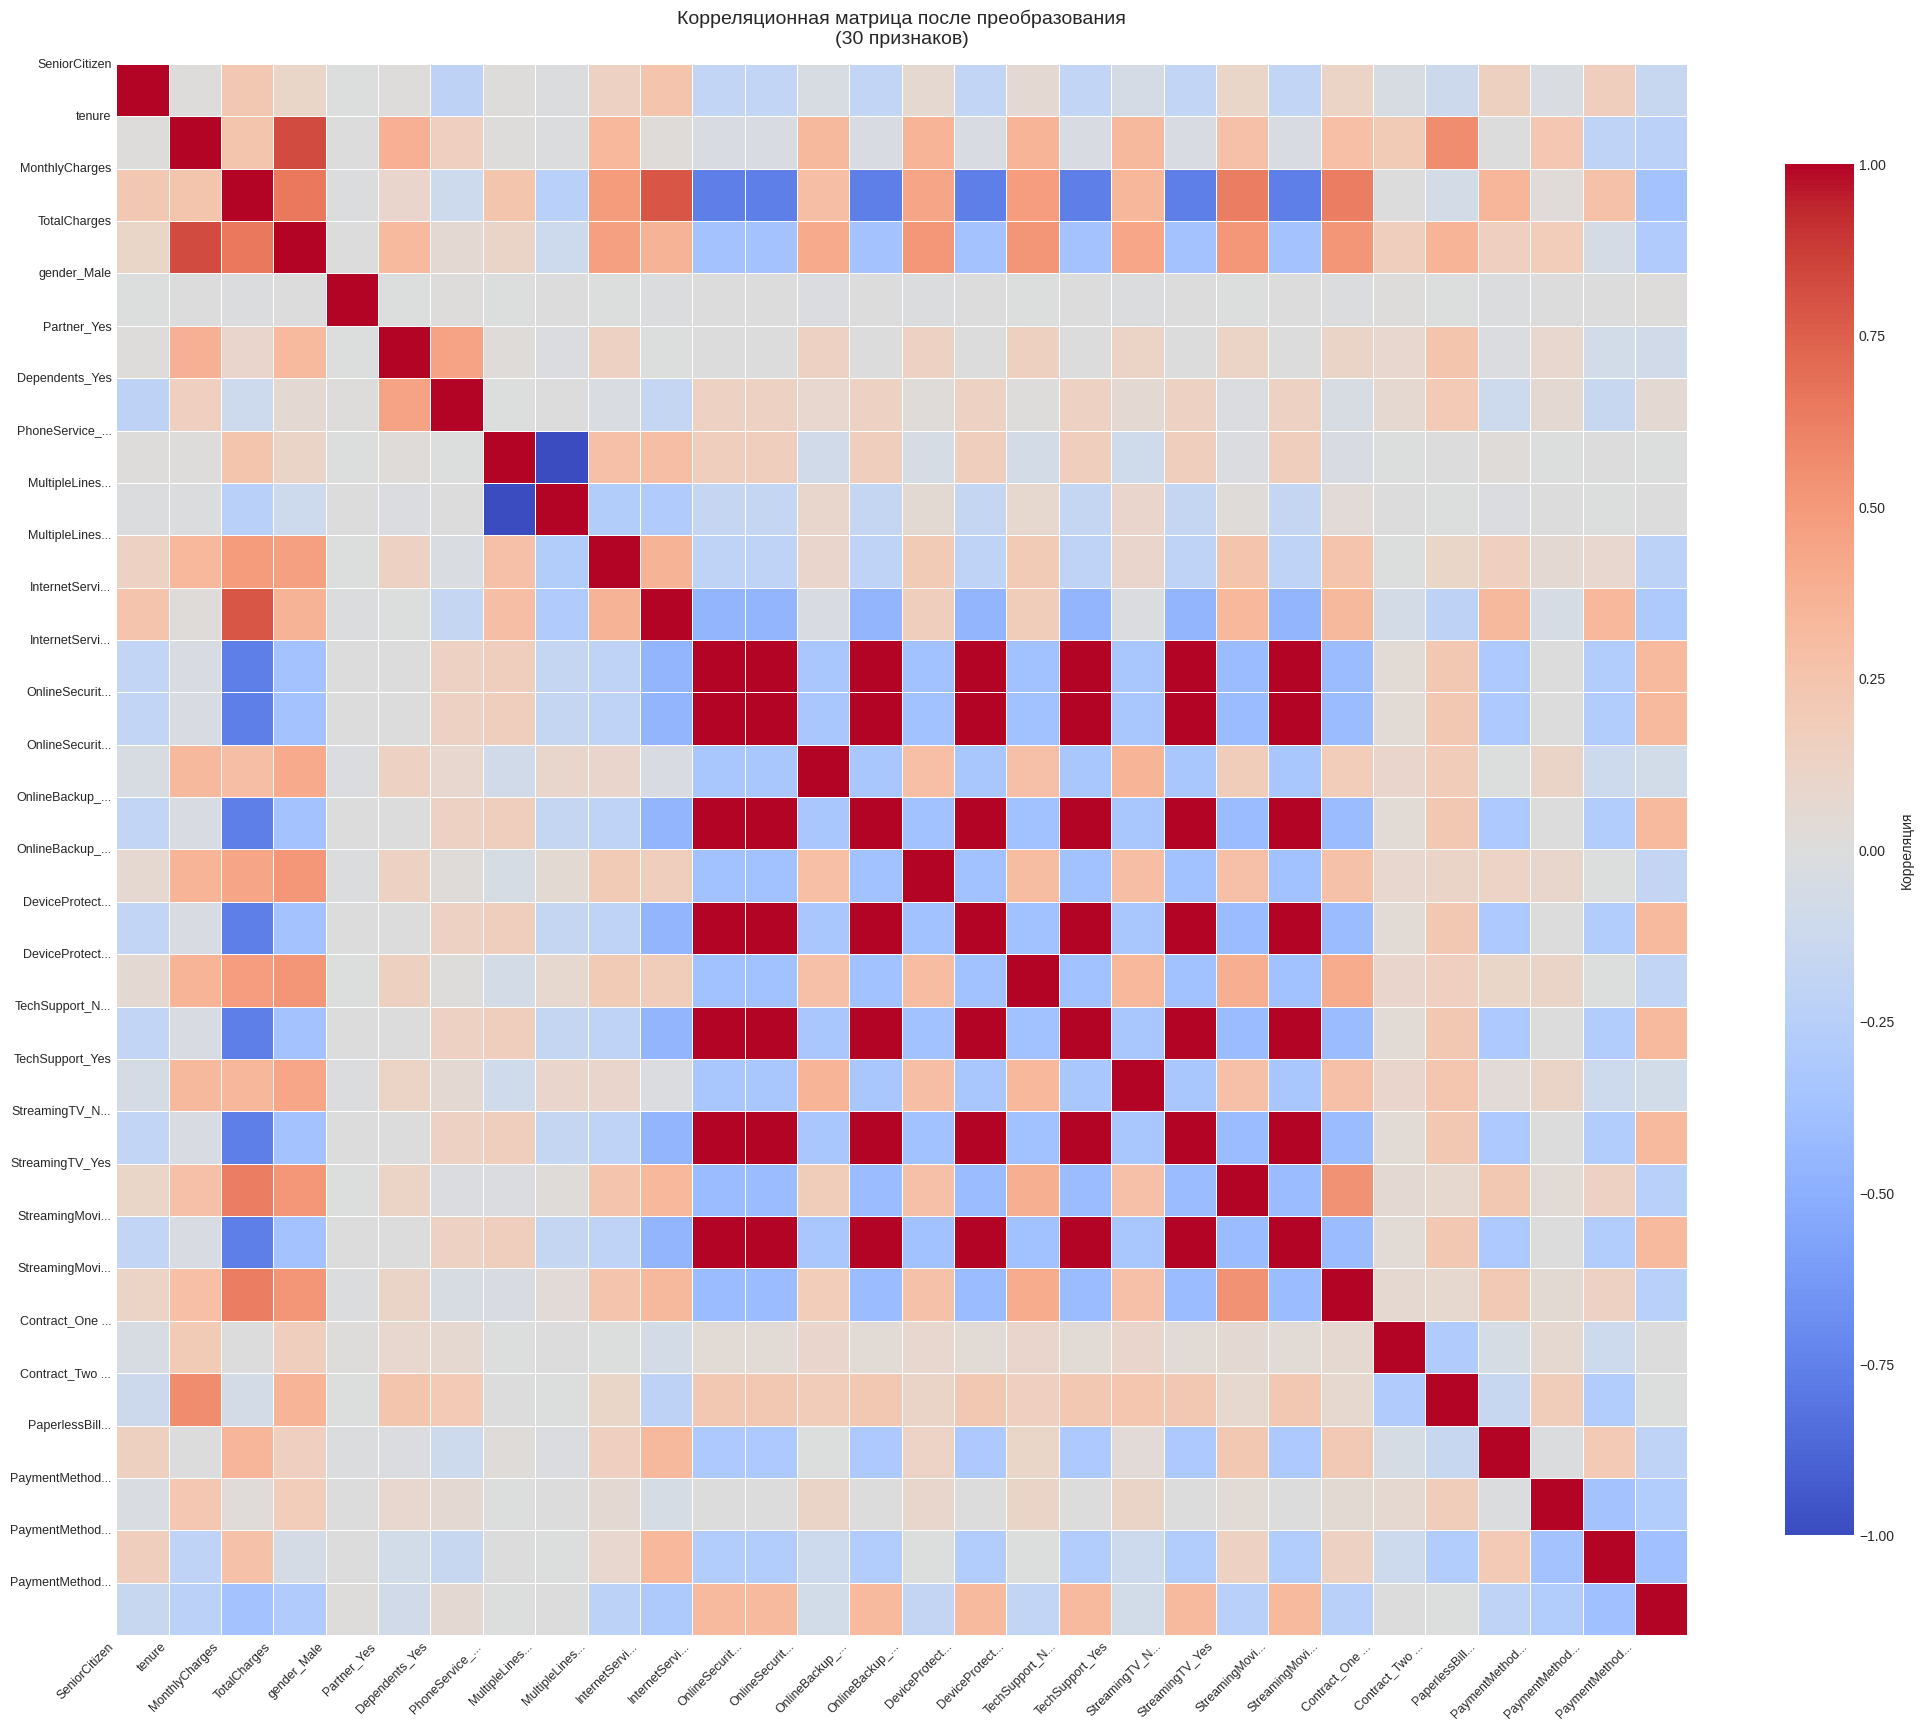


 Разделение выполнено:
 X_train: (5616, 30)
 X_test: (1405, 30)
 Y_train: (5616,) (распределение: {0: np.int64(4131), 1: np.int64(1485)})
 Y_test: (1405,) (распределение: {0: np.int64(1033), 1: np.int64(372)})
Fitting 3 folds for each of 36 candidates, totalling 108 fits

 Подбор параметров завершен
Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
Лучший ROC-AUC на кросс-валидации: 0.8275

 Получившиеся метрики:


,Метрика,Значение
0,Accuracy,0.792171
1,Precision,0.630719
2,Recall,0.518817
3,F1-Score,0.569322
4,ROC-AUC,0.824069


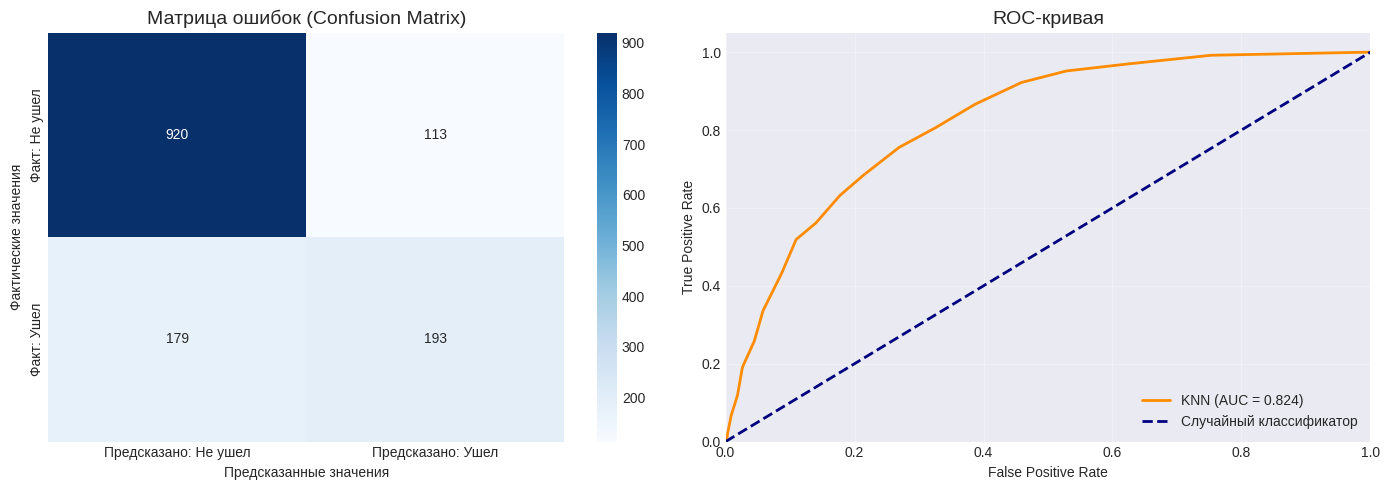

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('data/data.csv')
print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nПроверка пропущенных значений:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


# Выполним более широкую предподготовку
df_clean = df.copy()

# удалим id покупателя
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop('customerID', axis=1)

# обработаем TotalCharges столбец, тк он категориальный, но имеет много значений
if 'TotalCharges' in df_clean.columns:
    print("\nОбработка TotalCharges:")
    df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(str).str.strip()
    df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(['', ' '], np.nan)
    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Кодируем целевую переменную
if 'Churn' in df_clean.columns:
    df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})
    print(" Целевая переменная 'Churn' закодирована: No→0, Yes→1")

# Разделяем признаки по типам
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")

# почистим данные от дубликатов и NaN
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['Churn'])
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} строк с пропущенным Churn")

initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} дубликатов")

print(f"\n Итоговый размер данных: {df_clean.shape}")



# Визуализируем распределение целевой переменной и выведем матрицу корреляции имеющихся до преобразования числовых признаков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

churn_counts = df_clean['Churn'].value_counts()
bars = axes[0].bar(['Не ушли (0)', 'Ушли (1)'], churn_counts.values,
                   color=['#4CAF50', '#F44336'], alpha=0.8)
axes[0].set_title('Распределение целевой переменной Churn', fontsize=14, pad=15)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    percentage = height / len(df_clean) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2., height + max(churn_counts.values)*0.01,
                 f'{int(height)}\n({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

if len(numeric_cols) > 1:
    correlation_matrix = df_clean[numeric_cols].corr()

    im = axes[1].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title('Корреляционная матрица числовых признаков', fontsize=14, pad=15)
    axes[1].set_xlabel('Признаки', fontsize=12)
    axes[1].set_ylabel('Признаки', fontsize=12)

    axes[1].set_xticks(range(len(numeric_cols)))
    axes[1].set_yticks(range(len(numeric_cols)))

    labels = []
    for col in numeric_cols:
        if len(col) > 12:
            labels.append(col[:10] + '..')
        else:
            labels.append(col)

    axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    axes[1].set_yticklabels(labels, fontsize=10)

    cbar = plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label('Коэффициент корреляции', fontsize=11)

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            corr_value = correlation_matrix.iloc[i, j]
            color = 'white' if abs(corr_value) > 0.5 else 'black'
            axes[1].text(j, i, f'{corr_value:.2f}',
                         ha='center', va='center',
                         color=color, fontsize=8, fontweight='bold')

else:
    axes[1].text(0.5, 0.5, 'Недостаточно числовых признаков\nдля корреляционного анализа',
                 ha='center', va='center', fontsize=12)
    axes[1].set_title('Корреляционная матрица', fontsize=14)

plt.suptitle('Визуализация данных после предобработки', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


# преобразуем категориальные признаки в числовые, посмотрим на корреляционную матрицу теперь
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

print(f" X.shape: {X.shape}")
print(f" y.shape: {y.shape}")
print(f" Распределение классов: {dict(y.value_counts())}")
print(f" Доля положительного класса: {y.mean():.3f}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)
print(f"\n Размер данных после предобработки: {X_processed.shape}")

feature_names = []

feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

if len(feature_names) > 1:

    corr_matrix = X_processed_df.corr()
    features_to_show = feature_names

    plt.figure(figsize=(max(12, len(features_to_show)*0.7), max(10, len(features_to_show)*0.6)))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=False)

    plt.title(f'Корреляционная матрица после преобразования\n({len(features_to_show)} признаков)',
              fontsize=14, pad=15)

    labels = []
    for col in features_to_show:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()



# Разделим данные на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n Разделение выполнено:")
print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {dict(y_train.value_counts())})")
print(f" Y_test: {y_test.shape} (распределение: {dict(y_test.value_counts())})")


# Создадим и обучим модель KNN
knn = KNeighborsClassifier()

# определим сетку параметров для обучения модели
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# используем кросс-валидацию для подбора параметров из сетки
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

# посмотрим на подобранные параметры
print("\n Подбор параметров завершен")
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

# обучим модель с лучшими параметрами
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# оценим модель стандартными метриками
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy, precision, recall, f1, roc_auc]
})

print("\nПолучившиеся метрики:")
display(metrics_df)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix)', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'KNN (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Обучим имплиментированный классификатор KNN на улучшенном бейзлайне, посмотрим метрики

Размер данных: (7043, 21)

Первые 5 строк:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

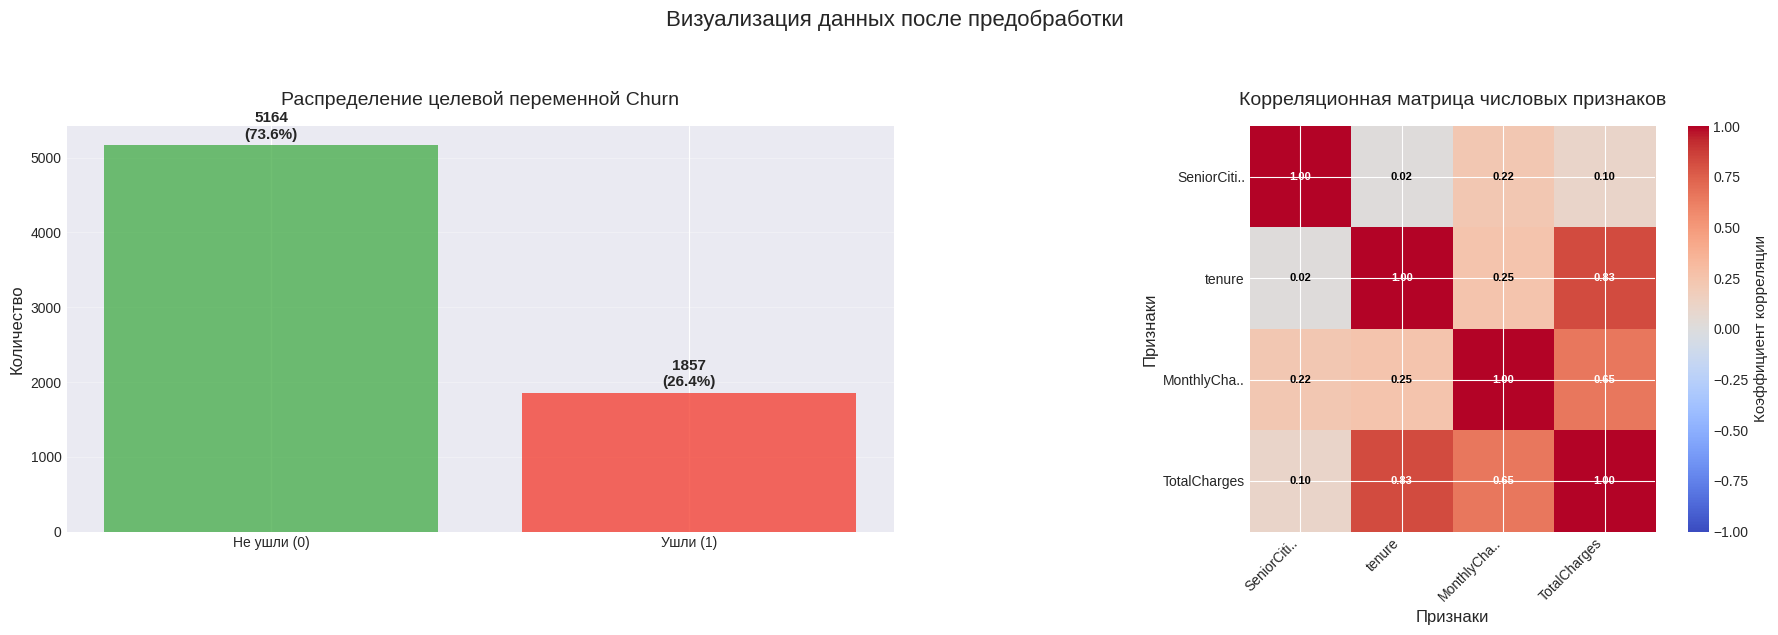

 X.shape: (7021, 19)
 y.shape: (7021,)
 Распределение классов: {0: np.int64(5164), 1: np.int64(1857)}
 Доля положительного класса: 0.264

 Размер данных после предобработки: (7021, 30)

 Количество признаков после one-hot кодирования: 30


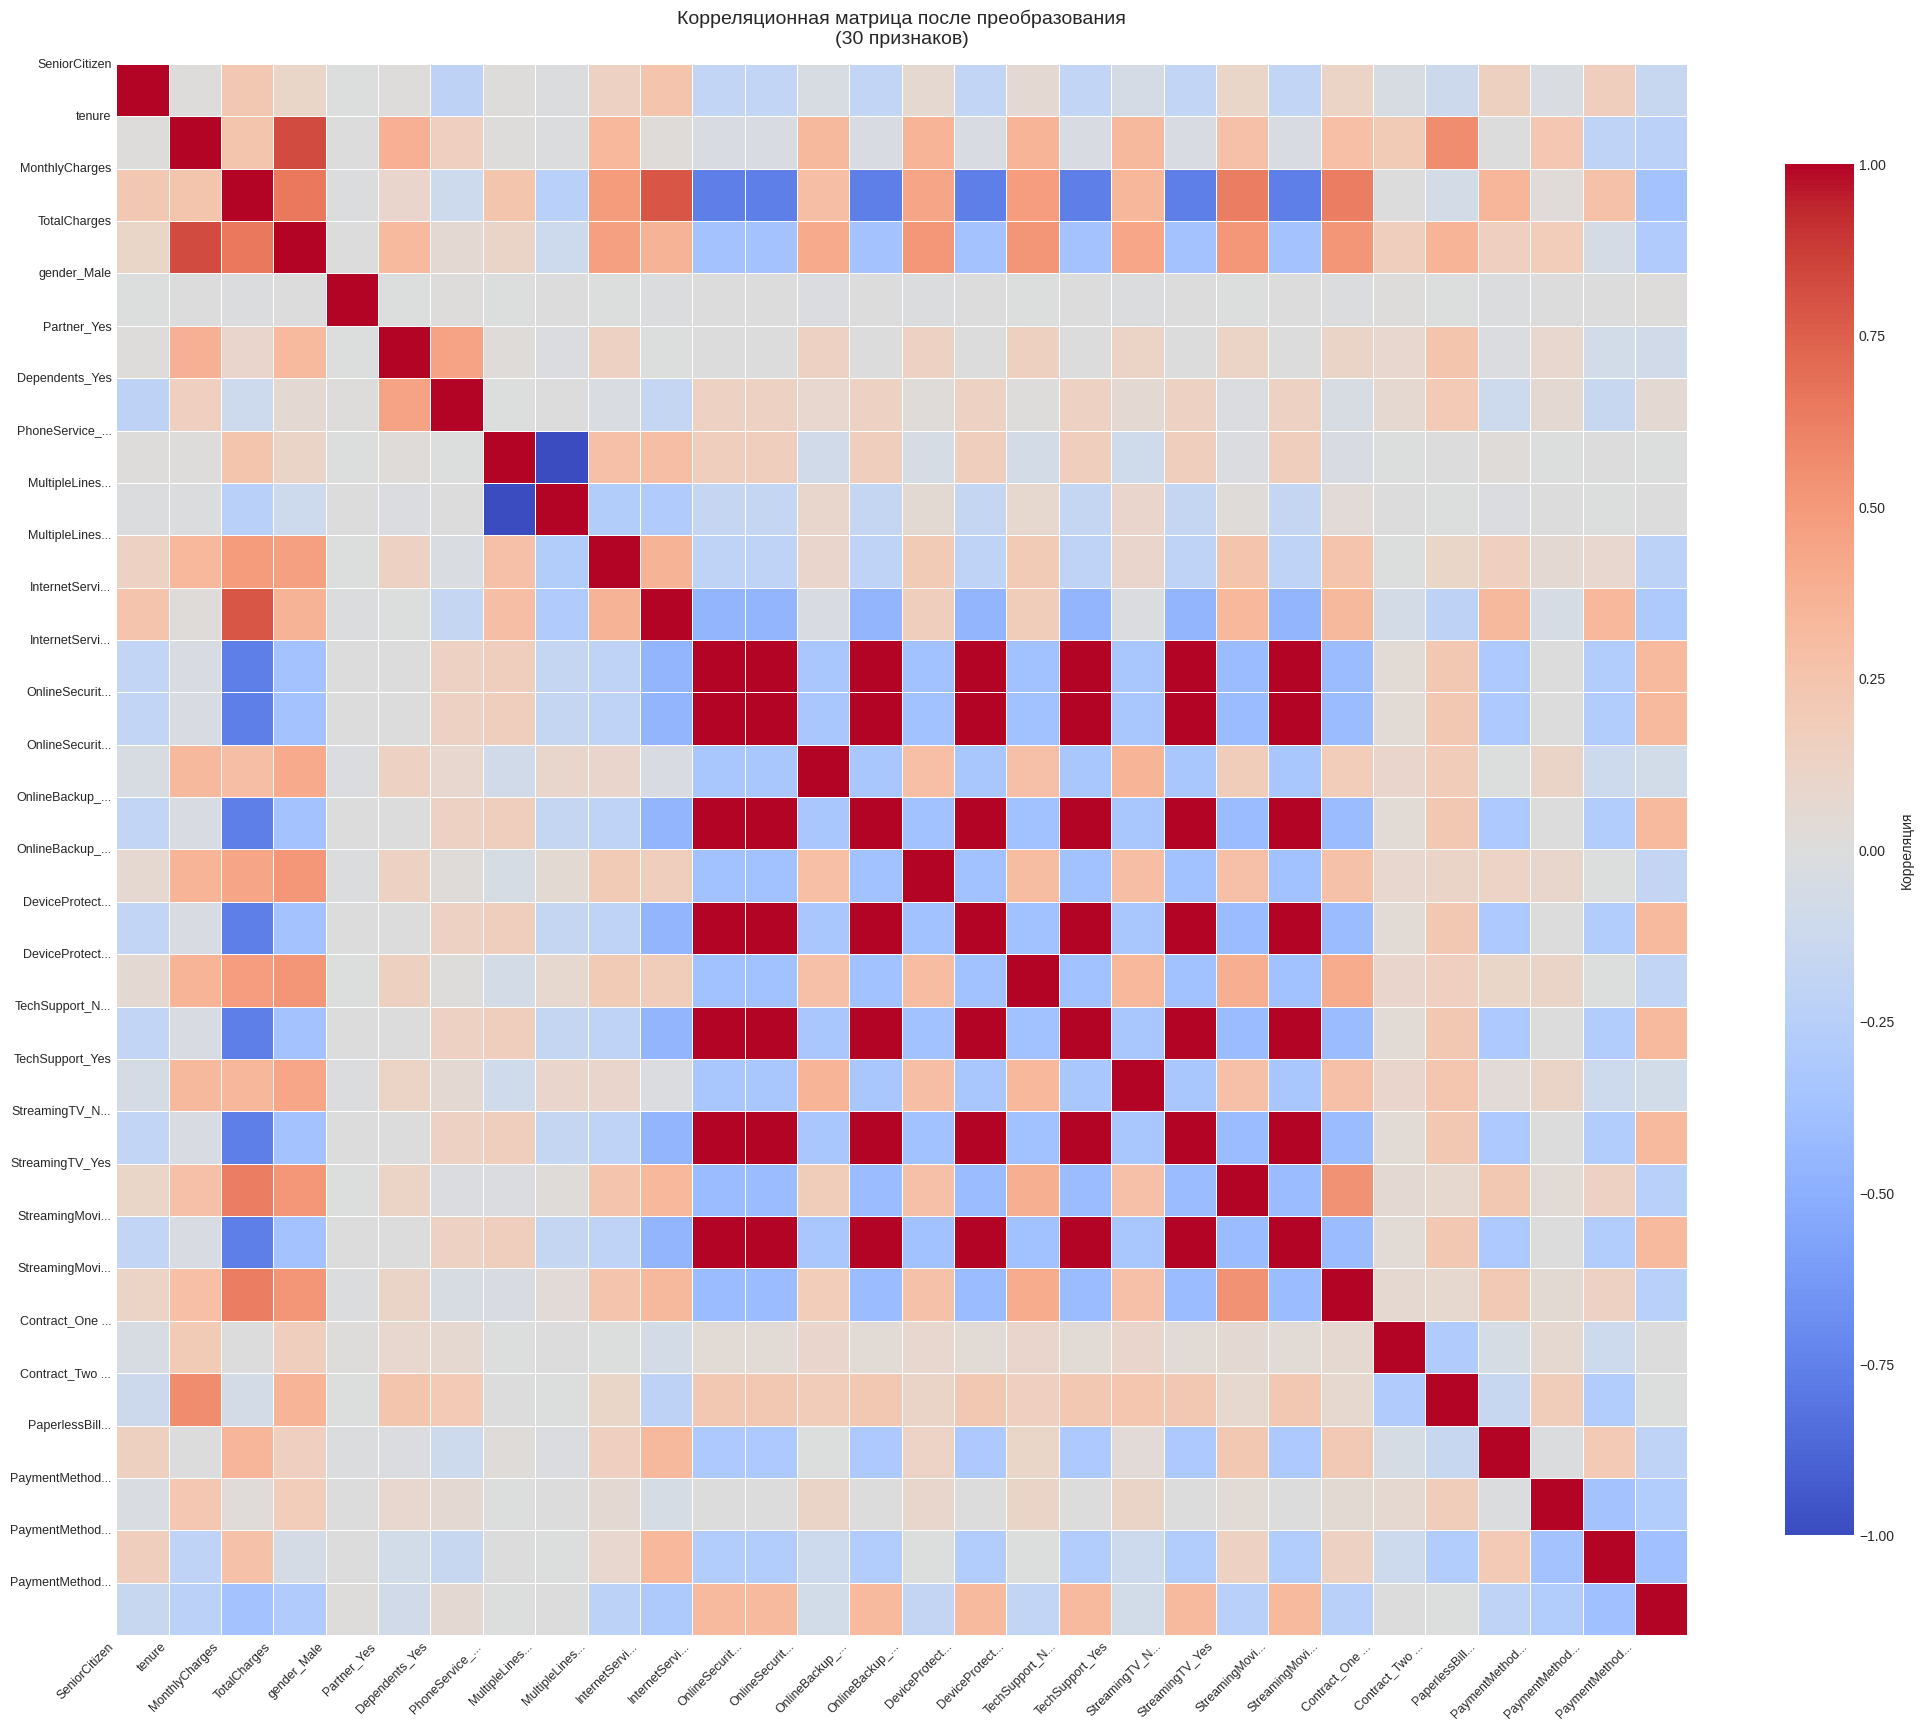


 Разделение выполнено:
 X_train: (5616, 30)
 X_test: (1405, 30)
 Y_train: (5616,) (распределение: {0: np.int64(4131), 1: np.int64(1485)})
 Y_test: (1405,) (распределение: {0: np.int64(1033), 1: np.int64(372)})
\Получившиеся метрики:


,Метрика,Значение
0,Accuracy,0.787900
1,Precision,0.614198
2,Recall,0.534946
3,F1-Score,0.571839
4,ROC-AUC,0.823946


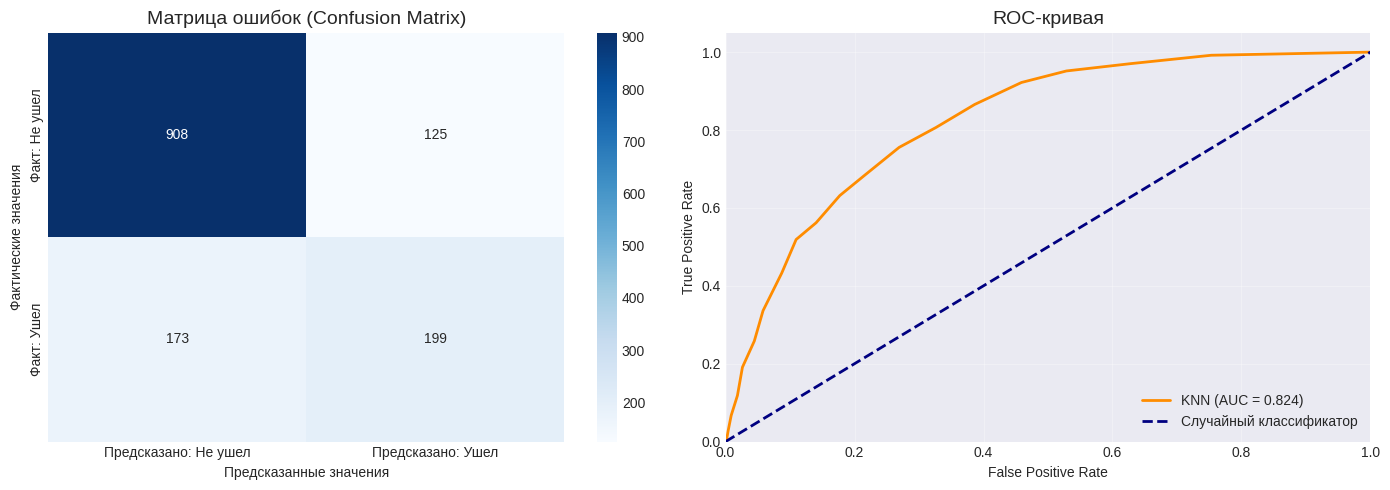

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

#имплиментированный классификатор
class MyKNNClassifier:

    def __init__(self, n_neighbors=5, weights='uniform', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric
        self.X_train = None
        self.y_train = None
        self.classes_ = None

    def _calculate_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Метрика '{self.metric}' не поддерживается")

    def _get_neighbors(self, x):
        distances = []

        for i, train_point in enumerate(self.X_train):
            dist = self._calculate_distance(x, train_point)
            distances.append((i, dist))

        distances.sort(key=lambda x: x[1])
        neighbors = distances[:self.n_neighbors]

        return neighbors

    def _predict_single(self, x):
        neighbors = self._get_neighbors(x)

        if self.weights == 'uniform':
            neighbor_labels = [self.y_train[idx] for idx, _ in neighbors]
            most_common = Counter(neighbor_labels).most_common(1)[0][0]
            return most_common

        elif self.weights == 'distance':
            votes = {}

            for idx, dist in neighbors:
                label = self.y_train[idx]
                weight = 1.0 / (dist + 1e-10)

                if label not in votes:
                    votes[label] = 0
                votes[label] += weight

            predicted_class = max(votes.items(), key=lambda x: x[1])[0]
            return predicted_class

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = []

        for x in X:
            pred = self._predict_single(x)
            predictions.append(pred)

        return np.array(predictions)

    def predict_proba(self, X):
        X = np.array(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        proba = np.zeros((n_samples, n_classes))

        for i, x in enumerate(X):
            neighbors = self._get_neighbors(x)

            if self.weights == 'uniform':
                neighbor_labels = [self.y_train[idx] for idx, _ in neighbors]
                counts = Counter(neighbor_labels)

                for j, cls in enumerate(self.classes_):
                    proba[i, j] = counts.get(cls, 0) / self.n_neighbors

            elif self.weights == 'distance':
                total_weight = 0
                class_weights = {cls: 0 for cls in self.classes_}

                for idx, dist in neighbors:
                    label = self.y_train[idx]
                    weight = 1.0 / (dist + 1e-10)
                    class_weights[label] += weight
                    total_weight += weight

                for j, cls in enumerate(self.classes_):
                    proba[i, j] = class_weights[cls] / total_weight if total_weight > 0 else 0

        return proba

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


# Загрузка данных
df = pd.read_csv('data/data.csv')
print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nПроверка пропущенных значений:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


# Выполним более широкую предподготовку
df_clean = df.copy()

# удалим id покупателя
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop('customerID', axis=1)

# обработаем TotalCharges столбец, тк он категориальный, но имеет много значений
if 'TotalCharges' in df_clean.columns:
    print("\nОбработка TotalCharges:")
    df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(str).str.strip()
    df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(['', ' '], np.nan)
    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Кодируем целевую переменную
if 'Churn' in df_clean.columns:
    df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})
    print(" Целевая переменная 'Churn' закодирована: No→0, Yes→1")

# Разделяем признаки по типам
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")

# почистим данные от дубликатов и NaN
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['Churn'])
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} строк с пропущенным Churn")

initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} дубликатов")

print(f"\n Итоговый размер данных: {df_clean.shape}")



# Визуализируем распределение целевой переменной и выведем матрицу корреляции имеющихся до преобразования числовых признаков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

churn_counts = df_clean['Churn'].value_counts()
bars = axes[0].bar(['Не ушли (0)', 'Ушли (1)'], churn_counts.values,
                   color=['#4CAF50', '#F44336'], alpha=0.8)
axes[0].set_title('Распределение целевой переменной Churn', fontsize=14, pad=15)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    percentage = height / len(df_clean) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2., height + max(churn_counts.values)*0.01,
                 f'{int(height)}\n({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

if len(numeric_cols) > 1:
    correlation_matrix = df_clean[numeric_cols].corr()

    im = axes[1].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title('Корреляционная матрица числовых признаков', fontsize=14, pad=15)
    axes[1].set_xlabel('Признаки', fontsize=12)
    axes[1].set_ylabel('Признаки', fontsize=12)

    axes[1].set_xticks(range(len(numeric_cols)))
    axes[1].set_yticks(range(len(numeric_cols)))

    labels = []
    for col in numeric_cols:
        if len(col) > 12:
            labels.append(col[:10] + '..')
        else:
            labels.append(col)

    axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    axes[1].set_yticklabels(labels, fontsize=10)

    cbar = plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label('Коэффициент корреляции', fontsize=11)

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            corr_value = correlation_matrix.iloc[i, j]
            color = 'white' if abs(corr_value) > 0.5 else 'black'
            axes[1].text(j, i, f'{corr_value:.2f}',
                         ha='center', va='center',
                         color=color, fontsize=8, fontweight='bold')

else:
    axes[1].text(0.5, 0.5, 'Недостаточно числовых признаков\nдля корреляционного анализа',
                 ha='center', va='center', fontsize=12)
    axes[1].set_title('Корреляционная матрица', fontsize=14)

plt.suptitle('Визуализация данных после предобработки', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


# преобразуем категориальные признаки в числовые, посмотрим на корреляционную матрицу теперь
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

print(f" X.shape: {X.shape}")
print(f" y.shape: {y.shape}")
print(f" Распределение классов: {dict(y.value_counts())}")
print(f" Доля положительного класса: {y.mean():.3f}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)
print(f"\n Размер данных после предобработки: {X_processed.shape}")

feature_names = []

feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

if len(feature_names) > 1:

    corr_matrix = X_processed_df.corr()
    features_to_show = feature_names

    plt.figure(figsize=(max(12, len(features_to_show)*0.7), max(10, len(features_to_show)*0.6)))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=False)

    plt.title(f'Корреляционная матрица после преобразования\n({len(features_to_show)} признаков)',
              fontsize=14, pad=15)

    labels = []
    for col in features_to_show:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()



# Разделим данные на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n Разделение выполнено:")
print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {dict(y_train.value_counts())})")
print(f" Y_test: {y_test.shape} (распределение: {dict(y_test.value_counts())})")


# Создадим и обучим имплиментированный KNN с лучшими параметрами, которые взяли с кросс валидации стандартного KNN
my_knn = MyKNNClassifier(n_neighbors=20, weights='uniform', metric='manhattan')

# Обучим модель
my_knn.fit(X_train, y_train)

# Сделаем предсказания
y_pred = my_knn.predict(X_test)
y_pred_proba = my_knn.predict_proba(X_test)[:, 1]

# Оценим модель стандартными метриками
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics_df_my = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy, precision, recall, f1, roc_auc]
})

print("\Получившиеся метрики:")
display(metrics_df_my)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix)', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'KNN (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Несмотря на то, что имплиментированный KNN на бейзлайне дал лучший результат, чем базовый KNN, его результат на улучшенном бейзоайне с кросс-валидацией совпал с результатом KNN классификатора на таком же бейзлайне. Проблема в том, что имплиментированная версия не поддерживает кросс валдиацию из sklearn, к тому же имеет меньше параметров, поэтому с более тонкой настройкой версия из sklearn точнее дает классификацию.**





**Теперь решаем задачу регрессии с датасетами data/linear/train_energy_data.csv и data/linear/test_energy_data.csv, то есть сразу имеем разделение на тестовую и обучающие выборки**

Обучим модель регрессии KNN, используя безлайны без сильной обработки выборок и оценим точности предсказания с помощью основных метрик.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# Загрузим данные (датасет для регрессии сразу разделен на тестовую и обучающие выборки)
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print("\nПервые 5 строк обучающей выборки:")
display(train_df.head())
print("\nПервые 5 строк тестовой выборки:")
display(test_df.head())

print("\nИнформация о данных (обучающая выборка):")
train_df.info()

# проверим на пропущенные значения
print("Проверка на пропущенные значения:")
print("Обучающая выборка:")
print(train_df.isnull().sum())
print("\nТестовая выборка:")
print(test_df.isnull().sum())

train_clean = train_df.copy()
test_clean = test_df.copy()

# Удалим категориальные признаки
categorical_cols = ['Building Type', 'Day of Week']
train_clean = train_clean.drop(categorical_cols, axis=1, errors='ignore')
test_clean = test_clean.drop(categorical_cols, axis=1, errors='ignore')

print(f" Обучающая выборка после обработки: {train_clean.shape}")
print(f" Тестовая выборка после обработки: {test_clean.shape}")

# Разделяем на признаки и целевую переменную
X_train = train_clean.drop('Energy Consumption', axis=1)
y_train = train_clean['Energy Consumption']

X_test = test_clean.drop('Energy Consumption', axis=1)
y_test = test_clean['Energy Consumption']

print(f" X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")

# Создаем и обучаем модель KNN для регрессии
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_regressor.fit(X_train, y_train)

print("\nМодель обучена")

# Делаем предсказания
y_pred_train = knn_regressor.predict(X_train)
y_pred_test = knn_regressor.predict(X_test)

print("Предсказания сделаны")

def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



Первые 5 строк тестовой выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59



Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
Проверка на пропущенные значения:
Обучающая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

Тестовая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appli

,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,417.777990,545.848580
1,MSE,264548.646440,445614.998502
2,RMSE,514.342927,667.544005
3,R²,0.695992,0.350628
4,MAPE (%),10.770710,13.476101


Имплиментируем регрессор KNN и обучим его на бейзлайне


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

#имплиментированный регрессор
class MyKNNRegressor:
    def __init__(self, n_neighbors=5, weights='uniform', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric
        self.X_train = None
        self.y_train = None

    def _calculate_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Метрика '{self.metric}' не поддерживается")

    def _get_neighbors(self, x):
        distances = []

        for i, train_point in enumerate(self.X_train):
            dist = self._calculate_distance(x, train_point)
            distances.append((i, dist))

        distances.sort(key=lambda x: x[1])
        neighbors = distances[:self.n_neighbors]

        return neighbors

    def _predict_single(self, x):
        neighbors = self._get_neighbors(x)

        if self.weights == 'uniform':
            neighbor_values = [self.y_train[idx] for idx, _ in neighbors]
            return np.mean(neighbor_values)

        elif self.weights == 'distance':
            total_weight = 0
            weighted_sum = 0

            for idx, dist in neighbors:
                value = self.y_train[idx]
                weight = 1.0 / (dist + 1e-10)
                weighted_sum += value * weight
                total_weight += weight

            return weighted_sum / total_weight if total_weight > 0 else 0

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = []

        for x in X:
            pred = self._predict_single(x)
            predictions.append(pred)

        return np.array(predictions)

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)


#загрузим данные
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print("\nПервые 5 строк обучающей выборки:")
display(train_df.head())
print("\nПервые 5 строк тестовой выборки:")
display(test_df.head())

print("Проверка на пропущенные значения:")
print("Обучающая выборка:")
print(train_df.isnull().sum())
print("\nТестовая выборка:")
print(test_df.isnull().sum())

train_clean = train_df.copy()
test_clean = test_df.copy()

categorical_cols = ['Building Type', 'Day of Week']
train_clean = train_clean.drop(categorical_cols, axis=1, errors='ignore')
test_clean = test_clean.drop(categorical_cols, axis=1, errors='ignore')

print(f" Обучающая выборка после обработки: {train_clean.shape}")
print(f" Тестовая выборка после обработки: {test_clean.shape}")

# Разделяем на признаки и целевую переменную
X_train = train_clean.drop('Energy Consumption', axis=1)
y_train = train_clean['Energy Consumption']

X_test = test_clean.drop('Energy Consumption', axis=1)
y_test = test_clean['Energy Consumption']

print(f" X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")

# Создаем и обучаем имплиментированную модель KNN регрессора
my_knn_regressor = MyKNNRegressor(n_neighbors=5, weights='uniform', metric='euclidean')
my_knn_regressor.fit(X_train, y_train)
print("\ Модель обучена")

y_pred_train = my_knn_regressor.predict(X_train)
y_pred_test = my_knn_regressor.predict(X_test)
print("Предсказания сделаны")

def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)


Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



Первые 5 строк тестовой выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


Проверка на пропущенные значения:
Обучающая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

Тестовая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64
 Обучающая выборка после обработки: (1000, 5)
 Тестовая выборка после обработки: (100, 5)
 X_train: (1000, 4)
 Y_train: (1000,)
 X_test: (100, 4)
 Y_test: (100,)

 Модель обучена
Предсказания сделаны

МЕТРИКИ КАЧЕСТВА МОДЕЛИ:


,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,417.777990,545.848580
1,MSE,264548.646440,445614.998502
2,RMSE,514.342927,667.544005
3,R²,0.695992,0.350628
4,MAPE (%),10.770710,13.476101


Теперь улучшим бейзлайн для регрессии, обучим заново модель на получившемся датасете. Применим кодирование категориальных признаков, чтобы получились правильные предсказания

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

 Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



 Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB

 Проверка пропущенных значений:
Обучающая выборка:
Series([], dtype: int64)

Тестовая выборка:
Series([], dtype: int64)

 Категориальные признаки (2): ['Building Type', 'Day of Week']

 Числовые признаки (4): ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']

 X_train: (1000, 6)
 Y_train: (1000,)
 X_tes

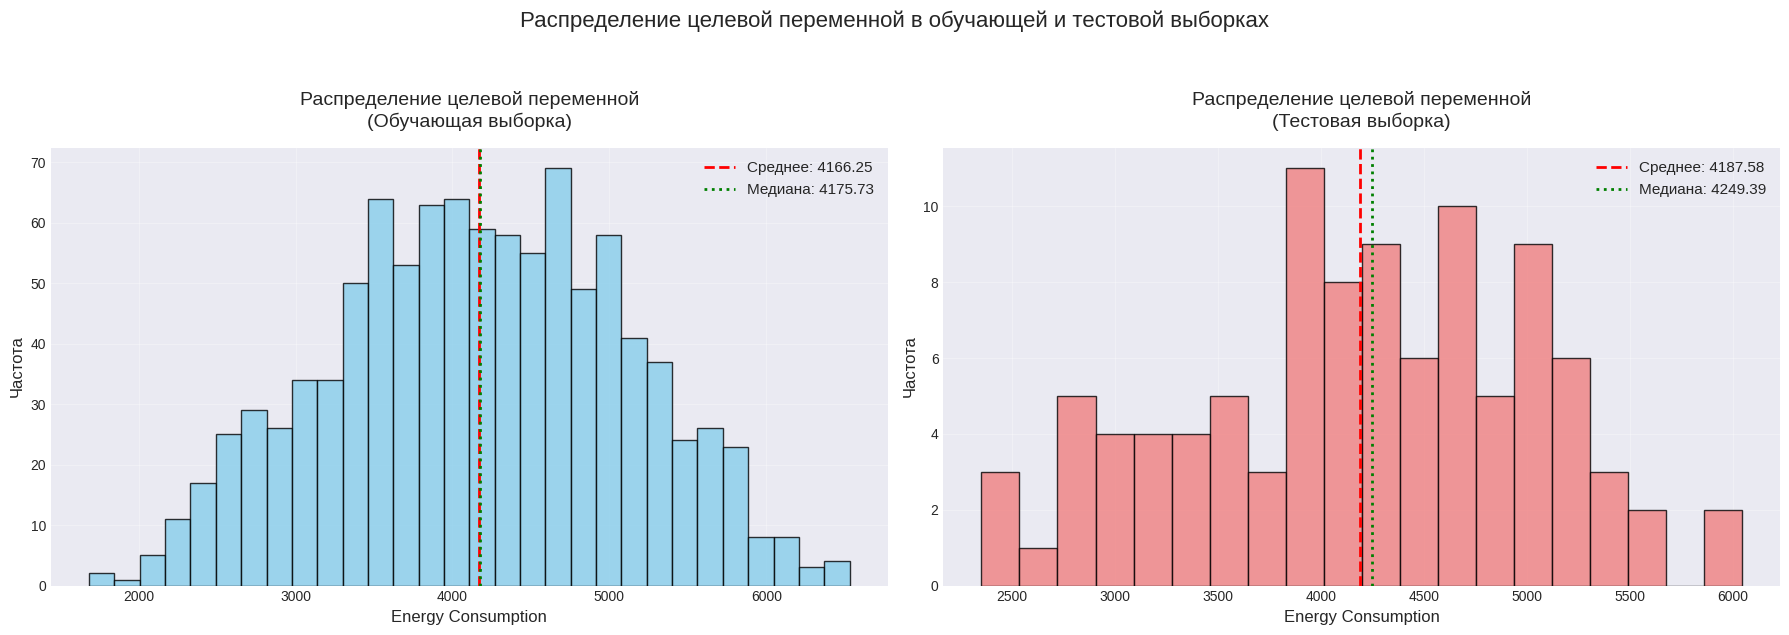

 Размер обучающих данных после предобработки: (1000, 7)
 Размер тестовых данных после предобработки: (100, 7)

 Количество признаков после one-hot кодирования: 7


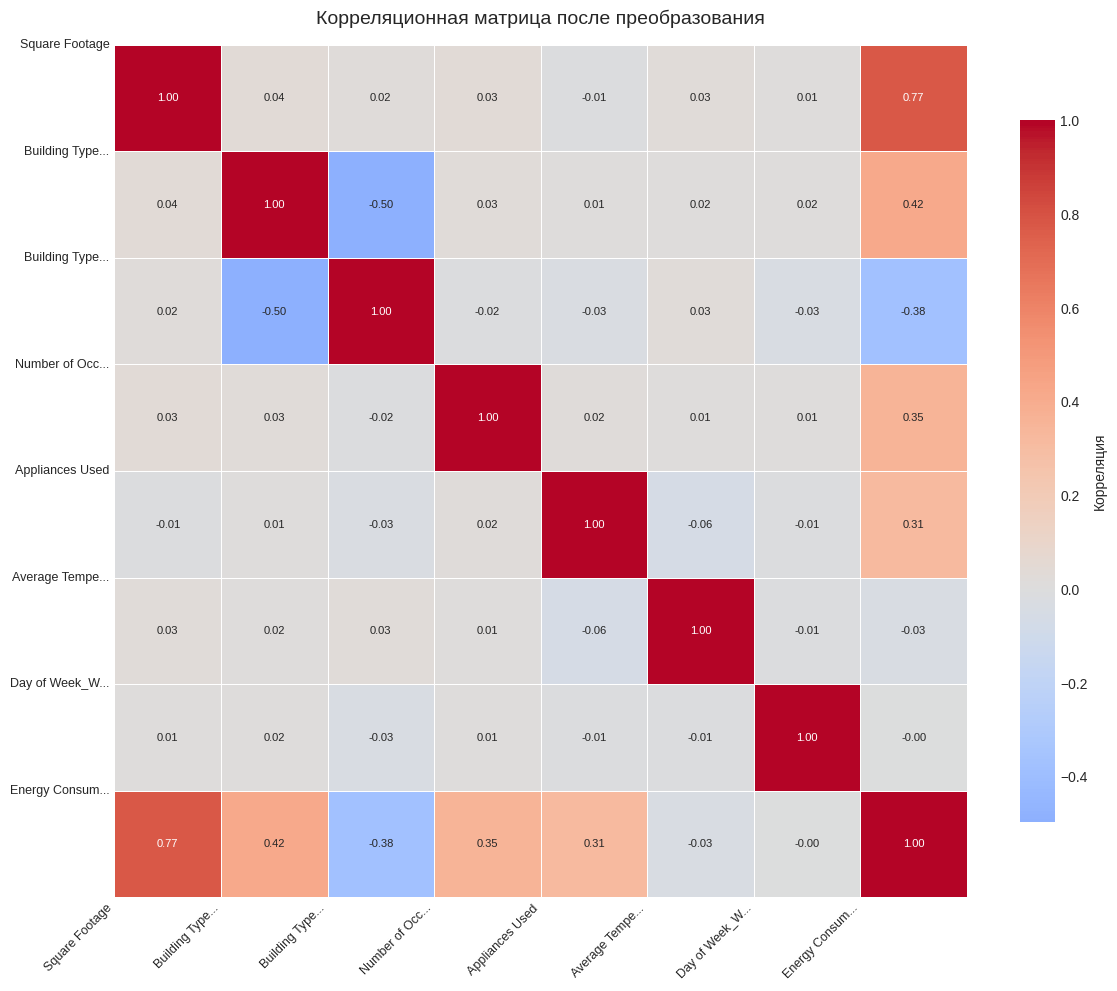

Fitting 3 folds for each of 14 candidates, totalling 42 fits

 Подбор параметров завершен
Лучшие параметры для модели: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

 Модель обучена

 Предсказания сделаны

МЕТРИКИ КАЧЕСТВА МОДЕЛИ:


,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,131.042380,138.491900
1,MSE,28148.491466,31376.473520
2,RMSE,167.775122,177.134055
3,R²,0.967653,0.954277
4,MAPE (%),3.395098,3.553859


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


# Загрузка данных
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"\n Первые 5 строк обучающей выборки:")
display(train_df.head())

print("\n Информация о данных (обучающая выборка):")
train_df.info()

print("\n Проверка пропущенных значений:")
missing_data_train = train_df.isnull().sum()
missing_data_test = test_df.isnull().sum()
print("Обучающая выборка:")
print(missing_data_train[missing_data_train > 0])
print("\nТестовая выборка:")
print(missing_data_test[missing_data_test > 0])



# преобразуем категориальные признаки в числовые
train_clean = train_df.copy()
test_clean = test_df.copy()

categorical_cols = train_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()

target_col = 'Energy Consumption'
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train = train_clean.drop(target_col, axis=1)
y_train = train_clean[target_col]

X_test = test_clean.drop(target_col, axis=1)
y_test = test_clean[target_col]

print(f"\n X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")



# посмотрим на распределение целевой переменной в обучающей и тестовых выборках
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


target_values_train = train_clean[target_col]
axes[0].hist(target_values_train, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Распределение целевой переменной\n(Обучающая выборка)', fontsize=14, pad=15)
axes[0].set_xlabel('Energy Consumption', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].grid(alpha=0.3)
mean_val_train = target_values_train.mean()
median_val_train = target_values_train.median()
axes[0].axvline(mean_val_train, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_train:.2f}')
axes[0].axvline(median_val_train, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_train:.2f}')
axes[0].legend(fontsize=11)


target_values_test = test_clean[target_col]
axes[1].hist(target_values_test, bins=20, color='lightcoral', edgecolor='black', alpha=0.8)
axes[1].set_title('Распределение целевой переменной\n(Тестовая выборка)', fontsize=14, pad=15)
axes[1].set_xlabel('Energy Consumption', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].grid(alpha=0.3)
mean_val_test = target_values_test.mean()
median_val_test = target_values_test.median()
axes[1].axvline(mean_val_test, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_test:.2f}')
axes[1].axvline(median_val_test, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_test:.2f}')
axes[1].legend(fontsize=11)

plt.suptitle('Распределение целевой переменной в обучающей и тестовой выборках',
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



# применим преобразование, посмотрим получившуюся матрицу корреляции
X_train_processed = preprocessor.fit_transform(X_train)
print(f" Размер обучающих данных после предобработки: {X_train_processed.shape}")
X_test_processed = preprocessor.transform(X_test)
print(f" Размер тестовых данных после предобработки: {X_test_processed.shape}")

feature_names = []
feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)

if len(feature_names) > 1:
    X_train_processed_df[target_col] = y_train.values

    correlations_with_target = X_train_processed_df.corr()[target_col].drop(target_col)
    top_features = correlations_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

    corr_matrix = X_train_processed_df[top_features + [target_col]].corr()

    plt.figure(figsize=(12, 10))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=True, fmt='.2f', annot_kws={"size": 8})

    plt.title('Корреляционная матрица после преобразования',
              fontsize=14, pad=15)

    # Форматируем подписи
    labels = []
    for col in top_features + [target_col]:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()




# Создадим и обучим модель регрессии
knn = KNeighborsRegressor()

# определим сетку параметров для кросс валидации
param_grid = {
    'n_neighbors': [7, 9, 11, 15, 20, 21, 25],
    'weights': ['uniform',],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)

knn_grid.fit(X_train_processed, y_train)

print("\n Подбор параметров завершен")
print(f"Лучшие параметры для модели: {knn_grid.best_params_}")

best_knn = knn_grid.best_estimator_
best_knn.fit(X_train_processed, y_train)
print("\n Модель обучена")

y_pred_train = best_knn.predict(X_train_processed)
y_pred_test = best_knn.predict(X_test_processed)
print("Предсказания сделаны")

# Вычисляем метрики
def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)

На подготовленном, улучшенном бейзлайне обучим имплиментированный KNN

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

 Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



 Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB

 Проверка пропущенных значений:
Обучающая выборка:
Series([], dtype: int64)

Тестовая выборка:
Series([], dtype: int64)

 Категориальные признаки (2): ['Building Type', 'Day of Week']

 Числовые признаки (4): ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']

 X_train: (1000, 6)
 Y_train: (1000,)
 X_tes

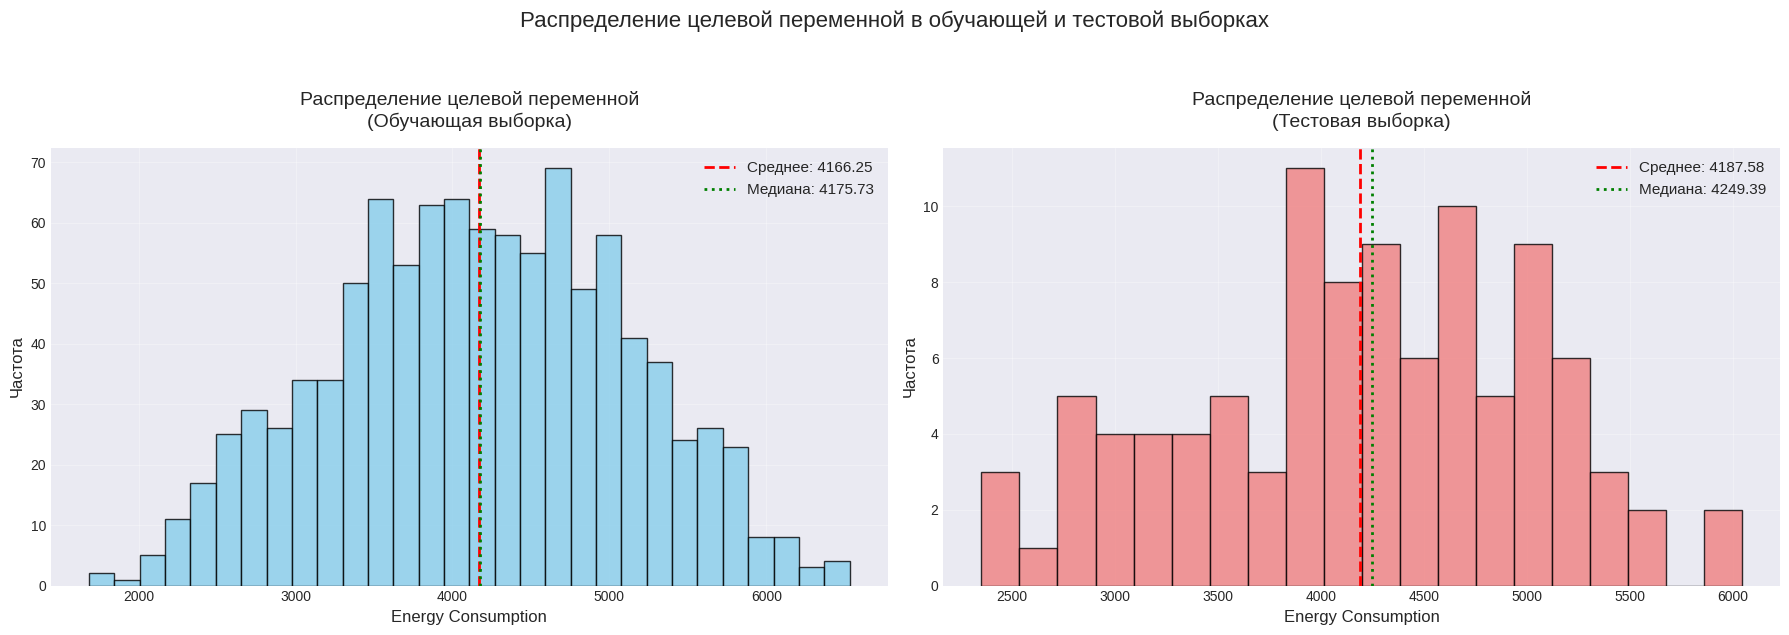

 Размер обучающих данных после предобработки: (1000, 7)
 Размер тестовых данных после предобработки: (100, 7)

 Количество признаков после one-hot кодирования: 7


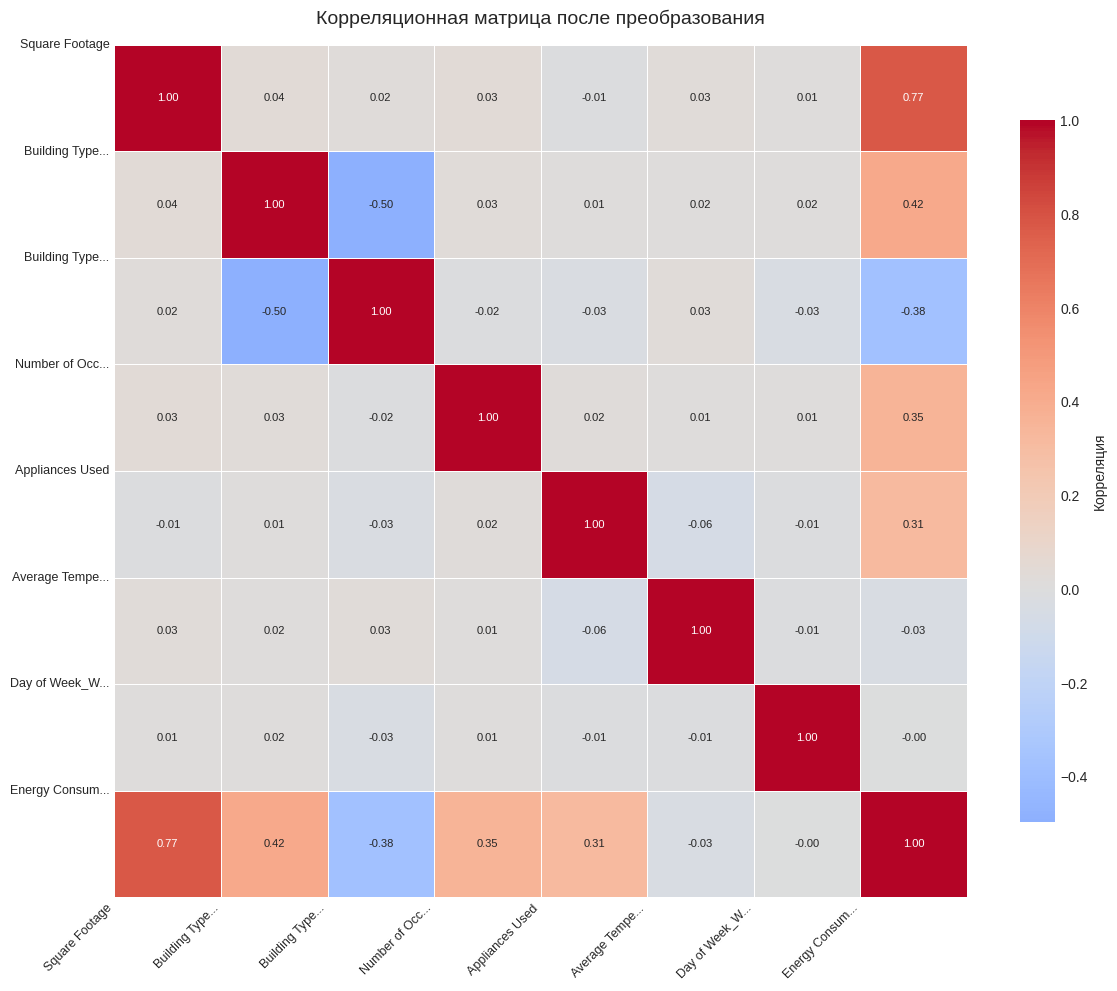


 Имплиментированная модель обучена

 Предсказания сделаны

МЕТРИКИ КАЧЕСТВА ИМПЛИМЕНТИРОВАННОЙ МОДЕЛИ:


,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,131.042380,138.491900
1,MSE,28148.491466,31376.473520
2,RMSE,167.775122,177.134055
3,R²,0.967653,0.954277
4,MAPE (%),3.395098,3.553859


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


#имплиментированный регрессор
class MyKNNRegressor:
    def __init__(self, n_neighbors=5, weights='uniform', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric
        self.X_train = None
        self.y_train = None

    def _calculate_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Метрика '{self.metric}' не поддерживается")

    def _get_neighbors(self, x):
        distances = []

        for i, train_point in enumerate(self.X_train):
            dist = self._calculate_distance(x, train_point)
            distances.append((i, dist))

        distances.sort(key=lambda x: x[1])
        neighbors = distances[:self.n_neighbors]

        return neighbors

    def _predict_single(self, x):
        neighbors = self._get_neighbors(x)

        if self.weights == 'uniform':
            neighbor_values = [self.y_train[idx] for idx, _ in neighbors]
            return np.mean(neighbor_values)

        elif self.weights == 'distance':
            total_weight = 0
            weighted_sum = 0

            for idx, dist in neighbors:
                value = self.y_train[idx]
                weight = 1.0 / (dist + 1e-10)
                weighted_sum += value * weight
                total_weight += weight

            return weighted_sum / total_weight if total_weight > 0 else 0

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = []

        for x in X:
            pred = self._predict_single(x)
            predictions.append(pred)

        return np.array(predictions)

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# Загрузка данных
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"\n Первые 5 строк обучающей выборки:")
display(train_df.head())

print("\n Информация о данных (обучающая выборка):")
train_df.info()

print("\n Проверка пропущенных значений:")
missing_data_train = train_df.isnull().sum()
missing_data_test = test_df.isnull().sum()
print("Обучающая выборка:")
print(missing_data_train[missing_data_train > 0])
print("\nТестовая выборка:")
print(missing_data_test[missing_data_test > 0])



# преобразуем категориальные признаки в числовые
train_clean = train_df.copy()
test_clean = test_df.copy()

categorical_cols = train_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()

target_col = 'Energy Consumption'
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train = train_clean.drop(target_col, axis=1)
y_train = train_clean[target_col]

X_test = test_clean.drop(target_col, axis=1)
y_test = test_clean[target_col]

print(f"\n X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")



# посмотрим на распределение целевой переменной в обучающей и тестовых выборках
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


target_values_train = train_clean[target_col]
axes[0].hist(target_values_train, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Распределение целевой переменной\n(Обучающая выборка)', fontsize=14, pad=15)
axes[0].set_xlabel('Energy Consumption', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].grid(alpha=0.3)
mean_val_train = target_values_train.mean()
median_val_train = target_values_train.median()
axes[0].axvline(mean_val_train, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_train:.2f}')
axes[0].axvline(median_val_train, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_train:.2f}')
axes[0].legend(fontsize=11)


target_values_test = test_clean[target_col]
axes[1].hist(target_values_test, bins=20, color='lightcoral', edgecolor='black', alpha=0.8)
axes[1].set_title('Распределение целевой переменной\n(Тестовая выборка)', fontsize=14, pad=15)
axes[1].set_xlabel('Energy Consumption', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].grid(alpha=0.3)
mean_val_test = target_values_test.mean()
median_val_test = target_values_test.median()
axes[1].axvline(mean_val_test, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_test:.2f}')
axes[1].axvline(median_val_test, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_test:.2f}')
axes[1].legend(fontsize=11)

plt.suptitle('Распределение целевой переменной в обучающей и тестовой выборках',
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



# применим преобразование, посмотрим получившуюся матрицу корреляции
X_train_processed = preprocessor.fit_transform(X_train)
print(f" Размер обучающих данных после предобработки: {X_train_processed.shape}")
X_test_processed = preprocessor.transform(X_test)
print(f" Размер тестовых данных после предобработки: {X_test_processed.shape}")

feature_names = []
feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)

if len(feature_names) > 1:
    X_train_processed_df[target_col] = y_train.values

    correlations_with_target = X_train_processed_df.corr()[target_col].drop(target_col)
    top_features = correlations_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

    corr_matrix = X_train_processed_df[top_features + [target_col]].corr()

    plt.figure(figsize=(12, 10))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=True, fmt='.2f', annot_kws={"size": 8})

    plt.title('Корреляционная матрица после преобразования',
              fontsize=14, pad=15)

    # Форматируем подписи
    labels = []
    for col in top_features + [target_col]:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()



# Создадим и обучим модель имплиментированную модель регрессии с параметрами, который нашли кросс-валидацией для модели из sklearn
my_knn_regressor = MyKNNRegressor(n_neighbors=7, weights='uniform', metric='euclidean')

my_knn_regressor.fit(X_train_processed, y_train)
print("\n Имплиментированная модель обучена")

y_pred_train = my_knn_regressor.predict(X_train_processed)
y_pred_test = my_knn_regressor.predict(X_test_processed)
print("Предсказания сделаны")

# Вычисляем метрики
def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА ИМПЛИМЕНТИРОВАННОЙ МОДЕЛИ:")
display(metrics_df)

**Все версии модели KNN регрессора, что из sklearn, что имплиментированная показали абсолютно одинаковые метрики на соответствующих датасетах. Это говорит о том, что регрессор KNN довольно простая модель, которая легко реализуется вручную. Возможно, это связано с тем, что регрессор был взят из KNN, который относится к методам так называемого "ленивого обучения", а также с тем, что регрессия - простая математическая операция без особой вариативности.**